# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.

‘Neighborhood’ indicates the location of the hospital.

‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
What factors do influence patients show up for their scheduled appointment?

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Loading data, check for cleanliness, and then trim and clean your dataset for analysis. 


### General Properties

In [37]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments-kagglev2-may-2016-Copy1.csv')

In [38]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Data contain 110527 appountment, and 14 columns.

In [40]:
#check for dublicates
sum(df.duplicated())

0

There are no duplicates in the dataset

In [41]:
#check for missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [42]:
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

There are no missing values

In [43]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Descriptive statistics show that the mean age is 37 years old, and about 32 % recieved SMS.

Additionally, -1 appear in Age column indicate a mistake that should be deleted through the cleaning process of data set.

In [44]:
#check the row that have -1 mistake.
mistake= df.query('Age == "-1"')
mistake

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [45]:
#check for unique values in PatientID.
df['PatientId'].nunique()

62299

In [13]:
#check for duplicated rows in patientId
df['PatientId'].duplicated().sum()

48228

Results explain that there are some patients have more than show appointments.

In [46]:
#check for patients duplicated and have the same show, and no show status.
df.duplicated(['PatientId', 'No-show']).sum()

38710

result means that 38710 appointment repeated with the same status of show and noshow in the same time.


### Data Cleaning
Cleaning and trim data and preparing before the analysis.
 

In [47]:
# Cleaning -1 mistake
df.drop(index=99832, inplace=True)

In [48]:
#to confirm change
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [49]:
#changing some error in column names
df.rename(columns= {'Hipertension':'Hypertension'}, inplace=True)
df.rename(columns= {'No-show':'No_show'}, inplace=True)

In [50]:
#to confirm change
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [57]:
#remove 38710 dublicates patientid with No_show
df.drop_duplicates(['PatientId', 'No_show'], inplace=True)

In [58]:
#to confirm, dataframe shape
df.shape

(71816, 14)

In [59]:
#remove unneseccary columns before analyzing data
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)

In [60]:
#to confirm deleting
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

After data cleaning, now we will perform **Compute statistics** and **create visualizations** with the goal of addressing the research questions that we posed in the Introduction section. 


### Research Question 1 (General look and analysis of data)

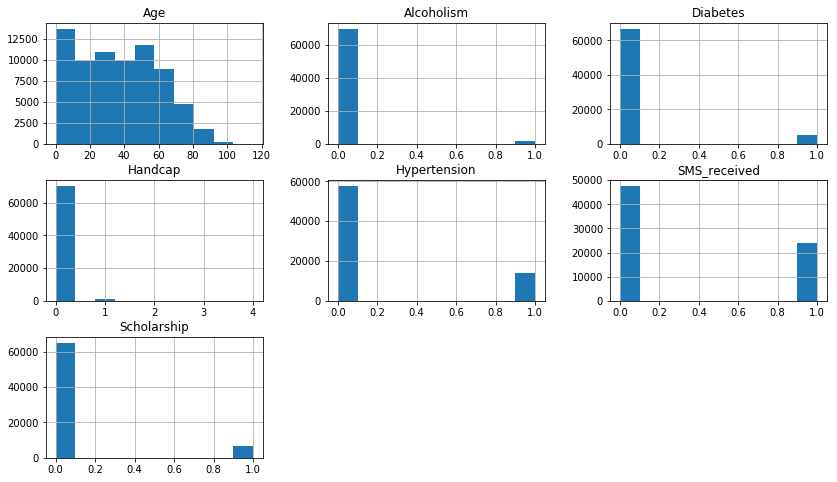

In [62]:
#Data representing by histogram
df.hist(figsize=(14, 8));

Histogram states that, no of show up attendance is between age nearly from 0 to 10 years old. 

No. of Diabetes attending the show up is more No. of Hypertention patients. 

Generally, No. of chronic disease patients is low.

No. of patients that recieved SMS shortly is nearly half of non-recieved patients.

Perecnt of scholarship patients is low than non-scholarship (means they do not included in the health insurance program.


In [63]:
#dividing the patients to show, or no show groups
show=df.No_show=='No'
noshow=df.No_show=='Yes'

In [3]:
df[show].count(),df[noshow].count()

NameError: name 'df' is not defined

No. of show up appoints are 54153, whereas, no show up appointments are 17663.

In [66]:
df[show].mean(),df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

mean of Age of show up appoints is nearly 37 years old, whereas, mean of no show paints age is 34 years old.

Additionally, recieved SMS paints are nearly 29 % that is a low percent as shown in the histogram previously.

### Research Question 2  (Influence of various effects of no. of appointments attendence)

Text(0,0.5,'Attendance no')

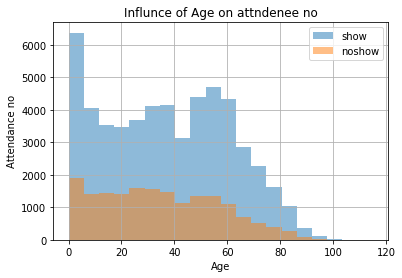

In [69]:
# Age influence on attendance no, with shoe, or no show status
df.Age[show].hist(alpha=0.5, bins=20, label='show')
df.Age[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.legend();
plt.title('Influnce of Age on attndenee no')
plt.xlabel('Age')
plt.ylabel('Attendance no')

No. of Show up patients is generally higher than of no show up. Additionally, patients of age 0 to 10 is the highest show up that indicates the careful behaviour of their parents. 

Wherease, No. of show patients reduces after the age of 60 years old.

Text(0,0.5,'Mean Age')

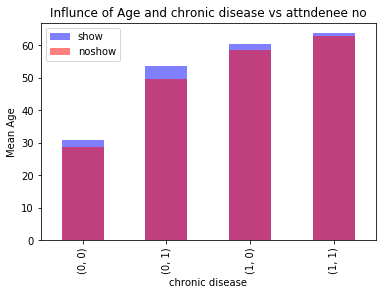

In [95]:
#investigate both age and chronic diseases on the attendence no.
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',alpha=0.5, color= 'blue', label='show')
df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age'].plot(kind='bar',alpha=0.5, color= 'red', label='noshow')
plt.legend();
plt.title('Influnce of Age and chronic disease vs attndenee no')
plt.xlabel('chronic disease')
plt.ylabel('Mean Age')

In this bar chart, Non-chronic diseases is lower age under 30 years old, and most of them no show up, whereas Diabetes patients are in age 50 years old and percent of no show up is less than no show up also.

The same of the show up in the state of hypertention but their ages is a round 60 years old. 

Whilst, paints over 60 has nearly no show up and they are diabetes and hypertension chronic disease.

In [72]:
df[show].groupby(['Hypertension', 'Diabetes']).mean()['Age'], df[noshow].groupby(['Hypertension', 'Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

Text(0,0.5,'Attendance no')

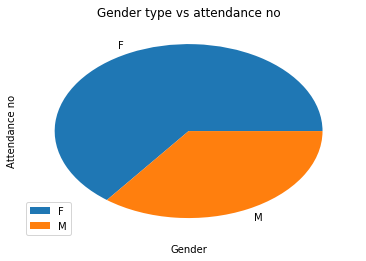

In [79]:
#effect of Gender type on attendance no in show status.
df.Gender[show].value_counts().plot(kind='pie', label='show')
plt.legend();
plt.title('Gender type vs attendance no')
plt.xlabel('Gender')
plt.ylabel('Attendance no')

pie chart shows that no of show up females is higher than males but has a less significance effect on the attendance.

Text(0,0.5,'Attendance no')

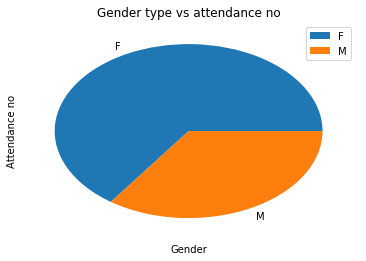

In [80]:
#effect of Gender type on attendance no in noshow status.
df.Gender[noshow].value_counts().plot(kind='pie', label='show')
plt.legend();
plt.title('Gender type vs attendance no')
plt.xlabel('Gender')
plt.ylabel('Attendance no')

In [96]:
The same of the previous where no of no show up female is higher than males.

this indicate the non-significance of gender on the no os show no show up attendence.

SyntaxError: invalid syntax (<ipython-input-96-112da87993b5>, line 1)

Text(0,0.5,'Attendance no')

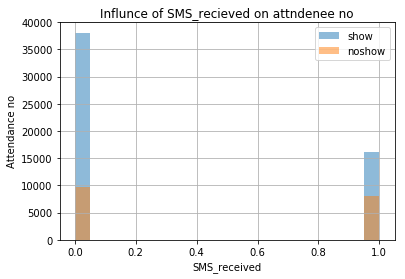

In [97]:
#investigate SMS_received vs. show, and noshow attendance
df.SMS_received[show].hist(alpha=0.5, bins=20, label='show')
df.SMS_received[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.legend();
plt.title('Influnce of SMS_recieved on attndenee no')
plt.xlabel('SMS_received')
plt.ylabel('Attendance no')

This histogram shows that no. of non recieved SMS confirmation is double the no. of non-recieved SMS patients.

Furthermore, recieved SMS patients show up patients is nearly equal to no show up, wherease non recieved ones no. of show up patients is higher than no of no show up patient.

Text(0,0.5,'Attendance no')

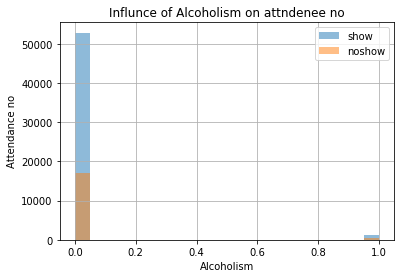

In [83]:
#investigate SMS_received vs. show, and noshow attendance
df.Alcoholism[show].hist(alpha=0.5, bins=20, label='show')
df.Alcoholism[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.legend();
plt.title('Influnce of Alcoholism on attndenee no')
plt.xlabel('Alcoholism')
plt.ylabel('Attendance no')

This chart illustrates that percent of alcoholism people is very low and no of show and no show up attendance is nearly equal.

Text(0,0.5,'Mean Alcoholism')

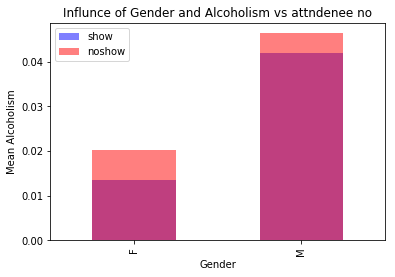

In [94]:
#influence of Gender and Alcoholism vs show, and no show attendance patient.
df[show].groupby(['Gender']).mean()['Alcoholism'].plot(kind='bar',alpha=0.5, color= 'blue', label='show')
df[noshow].groupby(['Gender']).mean()['Alcoholism'].plot(kind='bar',alpha=0.5, color= 'red', label='noshow')
plt.legend();
plt.title('Influnce of Gender and Alcoholism vs attndenee no')
plt.xlabel('Gender')
plt.ylabel('Mean Alcoholism')

Percent of Male have alcohol is more than percent of female, and in both of male and female percent of show up patients is more non-show up.

Text(0,0.5,'Attendance no')

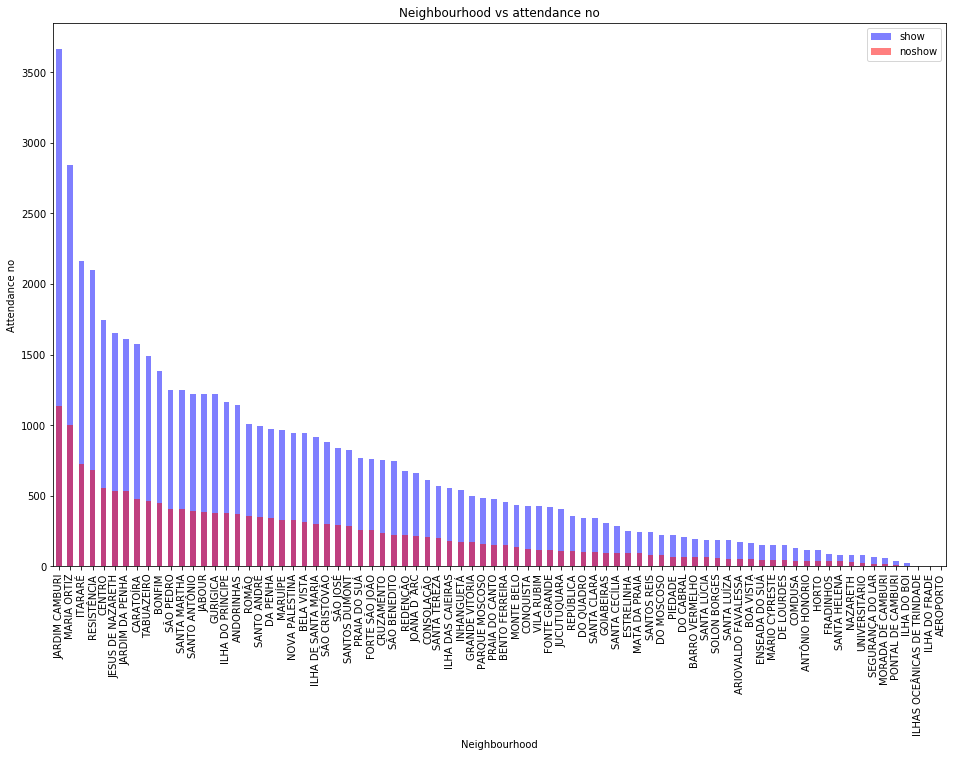

In [89]:
#effect of Gender type on attendance no in show status.
plt.figure(figsize=[16,10]);
df.Neighbourhood[show].value_counts().plot(kind='bar',alpha=0.5, color= 'blue', label='show')
df.Neighbourhood[noshow].value_counts().plot(kind='bar',alpha=0.5, color= 'red', label='noshow')
plt.legend();
plt.title('Neighbourhood vs attendance no')
plt.xlabel('Neighbourhood')
plt.ylabel('Attendance no')

In [ ]:
This chart illustrates the difference in patience no and attendance according to the Neighbourhoud that show high influence. for instance IARDIM CAMBURI is the highest no of patients and highest show up appointments in comparison to other Neighbourhood states.

Text(0,0.5,'Attendance no')

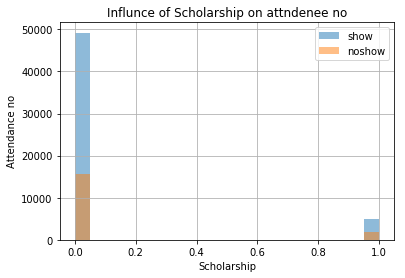

In [98]:
#investigate SMS_received vs. show, and noshow attendance
df.Scholarship[show].hist(alpha=0.5, bins=20, label='show')
df.Scholarship[noshow].hist(alpha=0.5, bins=20, label='noshow')
plt.legend();
plt.title('Influnce of Scholarship on attndenee no')
plt.xlabel('Scholarship')
plt.ylabel('Attendance no')

<a id='conclusions'></a>
## Conclusions

Abrief summary for evvery step was provided under every line of code results. 
But generally, it can be canclauded that Neighbourhood name has high influence on the pations show up. 

Whereas Gender has no effect on the patients show up.

No-difference in the state of Alcoholism, chronic disease aptients where percent of show up and no show up nearly the same.

Recieving SMS does not affect the show up percent where it was noticed percent of attendence in the patients not recieved SMS is higher than the recieved patients. 

No. of patients that have health insurance is very low, and does not affect the attendnace no. 

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [99]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0